TMM results outputted as netcdf files using /home/ph290/tmm/load_output_with_restarts.m

grid files and example files from:
https://ecco-v4-python-tutorial.readthedocs.io/Downloading_the_ECCO_v4_state_estimate.html

https://ecco-v4-python-tutorial.readthedocs.io/Installing_Python_and_Python_Packages.html

In [1]:
import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
import iris

import sys
sys.path.append('/Users/ph290/ECCOv4-py')
import ecco_v4_py as ecco



## grid variables: http://wwwcvs.mitgcm.org/viewvc/MITgcm/MITgcm_contrib/gael/matlab_class/gcmfaces.pdf?view=co&revision=1.5

XC : [1x1 gcmfaces] longitude (tracer)

YC : [1x1 gcmfaces] latitude (tracer)

RC : [50x1 double] depth (tracer)

XG : [1x1 gcmfaces] longitude (vorticity)

YG : [1x1 gcmfaces] latitude (vorticity)

RF : [51x1 double] depth (velocity along 3rd dim)

DXC : [1x1 gcmfaces] grid spacing (tracer, 1st dim)

DYC : [1x1 gcmfaces] grid spacing (tracer, 2nd dim)

DRC : [50x1 double] grid spacing (tracer, 3nd dim)

RAC : [1x1 gcmfaces] grid cell area (tracer)

DXG : [1x1 gcmfaces] grid spacing (vorticity, 1st dim)

DYG : [1x1 gcmfaces] grid spacing (vorticity, 2nd dim)

DRF : [50x1 double] grid spacing (velocity, 3nd dim)

RAZ : [1x1 gcmfaces] grid cell area (vorticity)

AngleCS : [1x1 gcmfaces] grid orientation (tracer, cosine)

AngleSN : [1x1 gcmfaces] grid orientation (tracer, cosine)

Depth : [1x1 gcmfaces] ocean bottom depth (tracer)

hFacC : [1x1 gcmfaces] partial cell factor (tracer)

hFacS : [1x1 gcmfaces] partial cell factor (velocity, 2nd dim)

hFacW : [1x1 gcmfaces] partial cell factor (velocity, 1rst dim)

In [2]:
## Set top-level file directory for the ECCO NetCDF files
## =================================================================
# base_dir = '/home/username/'
base_dir = '/Users/ph290/Downloads/'

## define a high-level directory for ECCO fields
ECCO_dir = base_dir + '/Release3_alt/'

## define the directory with the model grid
grid_dir = ECCO_dir + 'nctiles_grid/'

## load the grid
grid = ecco.load_ecco_grid_nc(grid_dir, 'ECCOv4r3_grid.nc')

salt_dir = ECCO_dir + '/nctiles_monthly/SALT/'
salt_dataset = xr.open_dataset(salt_dir + '/SALT_1992.nc')

In [157]:
dic1 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f1.nc')
dic2 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f2.nc')
dic3 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f3.nc')
dic4 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f4.nc')
dic5 = iris.load('/Users/ph290/Downloads/ecco4/DIC_1400_f5.nc')
dics = [dic1,dic2,dic3,dic4,dic5]

alk1 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f1.nc')
alk2 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f2.nc')
alk3 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f3.nc')
alk4 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f4.nc')
alk5 = iris.load('/Users/ph290/Downloads/ecco4/ALK_1400_f5.nc')
alks_1400 = [alk1,alk2,alk3,alk4,alk5]

alk1b = iris.load('/Users/ph290/Downloads/ecco4/ALK_1000_f1.nc')
alk2b = iris.load('/Users/ph290/Downloads/ecco4/ALK_1000_f2.nc')
alk3b = iris.load('/Users/ph290/Downloads/ecco4/ALK_1000_f3.nc')
alk4b = iris.load('/Users/ph290/Downloads/ecco4/ALK_1000_f4.nc')
alk5b = iris.load('/Users/ph290/Downloads/ecco4/ALK_1000_f5.nc')
alks_1000 = [alk1b,alk2b,alk3b,alk4b,alk5b]

alk1c = iris.load('/Users/ph290/Downloads/ecco4/ALK_0100_f1.nc')
alk2c = iris.load('/Users/ph290/Downloads/ecco4/ALK_0100_f2.nc')
alk3c = iris.load('/Users/ph290/Downloads/ecco4/ALK_0100_f3.nc')
alk4c = iris.load('/Users/ph290/Downloads/ecco4/ALK_0100_f4.nc')
alk5c = iris.load('/Users/ph290/Downloads/ecco4/ALK_0100_f5.nc')
alks_0100 = [alk1c,alk2c,alk3c,alk4c,alk5c]

In [158]:
print(np.max(alks_0100[0][2].data))
print(np.max(alks_1000[0][2].data))

2.742693813791179
2.7042304559783954


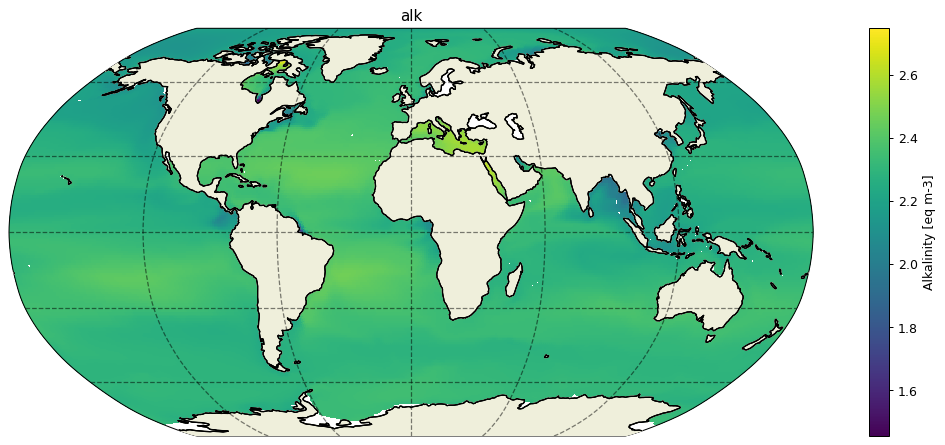

In [28]:
cubes = alks
title = 'alk'
standard_name = 'Alkalinity'
long_name = 'Alkalinity'
units = 'eq m-3'
depth = 0

dic_dataset = salt_dataset.copy()

cube_field  = dic_dataset.SALT.isel(time=0)
# mask to nan where hFacC(k=0) = 0
cube_field  = cube_field.where(grid.hFacC.isel(k=0))
cube_field = cube_field.isel(k=0)
cube_field.attrs['standard_name'] = standard_name
cube_field.attrs['long_name'] = long_name
cube_field.attrs['units'] = units

cube_field.isel(tile=0).data[:] = alks[0][2][depth,0:90,:].data.data
cube_field.isel(tile=1).data[:] = alks[0][2][depth,90:180,:].data.data
cube_field.isel(tile=2).data[:] = alks[0][2][depth,180:270,:].data.data

cube_field.isel(tile=3).data[:] = alks[1][2][depth,0:90,:].data.data
cube_field.isel(tile=4).data[:] = alks[1][2][depth,90:180,:].data.data
cube_field.isel(tile=5).data[:] = alks[1][2][depth,180:270,:].data.data

cube_field.isel(tile=6).data[:] = alks[2][2][depth,:,:].data.data

cube_field.isel(tile=7).data[:] = alks[3][2][depth,:,0:90].data.data
cube_field.isel(tile=8).data[:] = alks[3][2][depth,:,90:180].data.data
cube_field.isel(tile=9).data[:] = alks[3][2][depth,:,180:270].data.data

cube_field.isel(tile=10).data[:] = alks[4][2][depth,:,0:90].data.data
cube_field.isel(tile=11).data[:] = alks[4][2][depth,:,90:180].data.data
cube_field.isel(tile=12).data[:] = alks[4][2][depth,:,180:270].data.data

plt.figure(figsize=(16,6), dpi=90)
# ecco.plot_proj_to_latlon_grid(grid.XC, grid.YC, salt, show_colorbar=True, cmin=-1.5, cmax=1.5);plt.title('salt');
ecco.plot_proj_to_latlon_grid(grid.XC, grid.YC, cube_field, show_colorbar=True, );plt.title(title);
plt.savefig('/Users/ph290/Downloads/ecco4/'+title+'_plot.png')

## And a bit more neatly - a function to fill the 13 tiles of teh ecco v4 thing, and doing for all depths

In [173]:


def fill_3d_cube(cubes,salt_dataset,standard_name,long_name,units):
    tmp_dataset = salt_dataset.copy()
    cube_field  = tmp_dataset.SALT.isel(time=0)
    # mask to nan where hFacC(k=0) = 0
    cube_field  = cube_field.where(grid.hFacC)
    cube_field.attrs['standard_name'] = standard_name
    cube_field.attrs['long_name'] = long_name
    cube_field.attrs['units'] = units

    for depth in range(np.shape(cubes[0][2])[0]):
#         cube_field = cube_field.isel(k=0)
        cube_field.isel(k=depth).isel(tile=0).data[:] = cubes[0][2][depth,0:90,:].data.data
        cube_field.isel(k=depth).isel(tile=1).data[:] = cubes[0][2][depth,90:180,:].data.data
        cube_field.isel(k=depth).isel(tile=2).data[:] = cubes[0][2][depth,180:270,:].data.data

        cube_field.isel(k=depth).isel(tile=3).data[:] = cubes[1][2][depth,0:90,:].data.data
        cube_field.isel(k=depth).isel(tile=4).data[:] = cubes[1][2][depth,90:180,:].data.data
        cube_field.isel(k=depth).isel(tile=5).data[:] = cubes[1][2][depth,180:270,:].data.data

        cube_field.isel(k=depth).isel(tile=6).data[:] = cubes[2][2][depth,:,:].data.data

        cube_field.isel(k=depth).isel(tile=7).data[:] = cubes[3][2][depth,:,0:90].data.data
        cube_field.isel(k=depth).isel(tile=8).data[:] = cubes[3][2][depth,:,90:180].data.data
        cube_field.isel(k=depth).isel(tile=9).data[:] = cubes[3][2][depth,:,180:270].data.data

        cube_field.isel(k=depth).isel(tile=10).data[:] = cubes[4][2][depth,:,0:90].data.data
        cube_field.isel(k=depth).isel(tile=11).data[:] = cubes[4][2][depth,:,90:180].data.data
        cube_field.isel(k=depth).isel(tile=12).data[:] = cubes[4][2][depth,:,180:270].data.data
    return cube_field

        
title = 'alk'
standard_name = 'Alkalinity'
long_name = 'Alkalinity'
units = 'eq m-3'
cube_field_1400 = fill_3d_cube(alks_1400,salt_dataset,standard_name,long_name,units)
        
title = 'alk'
standard_name = 'Alkalinity'
long_name = 'Alkalinity'
units = 'eq m-3'
cube_field_1000 = fill_3d_cube(alks_1000,salt_dataset,standard_name,long_name,units)

title = 'alk'
standard_name = 'Alkalinity'
long_name = 'Alkalinity'
units = 'eq m-3'
cube_field_0100 = fill_3d_cube(alks_0100,salt_dataset,standard_name,long_name,units)

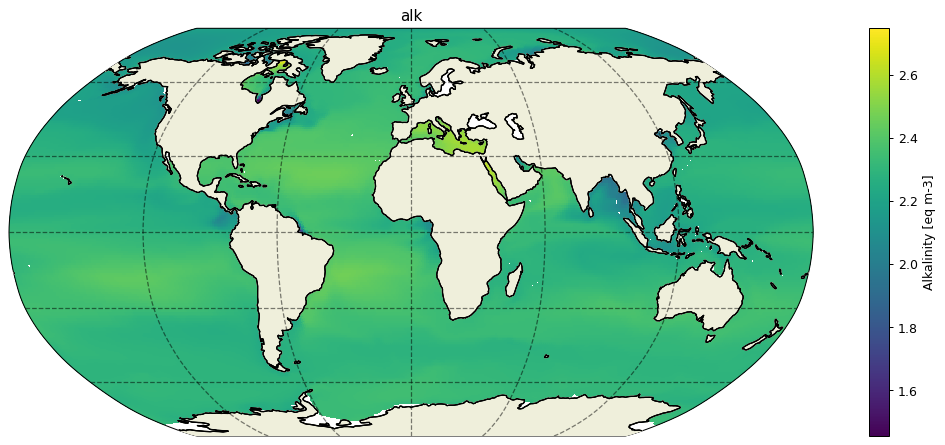

In [44]:
depth_to_plot = 0
plt.figure(figsize=(16,6), dpi=90)
ecco.plot_proj_to_latlon_grid(grid.XC, grid.YC, cube_field.isel(k=depth_to_plot), show_colorbar=True, );plt.title(title);
plt.savefig('/Users/ph290/Downloads/ecco4/'+title+'_plot.png')

## Area Averaging to create global profiles

In [174]:
def area_average_profile(grid,cube):
    no_levels = np.shape(cube)[1]
    out_array = np.zeros(no_levels)
    out_array[:] = 0.0
    for i in range(no_levels):
        cell_area_field_masked = grid.rA.where(cube.isel(k=i).hFacC > 0)
        tmp = ((cube.isel(k=i) * cell_area_field_masked).sum(dim=('i','j','tile')))/cell_area_field_masked.sum()
        out_array[i] = tmp.values
    return out_array

In [175]:
profile_array_1400 = area_average_profile(grid,cube_field_1400)
profile_array_1000 = area_average_profile(grid,cube_field_1000)
profile_array_0100 = area_average_profile(grid,cube_field_0100)

Text(0, 0.5, 'depth(m)')

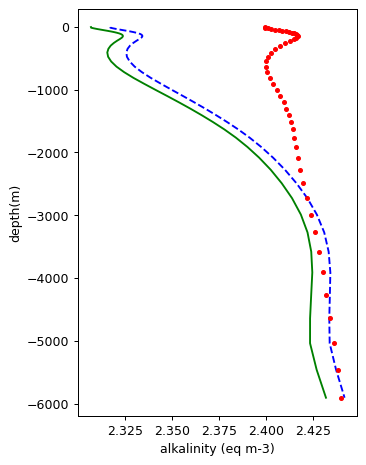

In [176]:
plt.figure(figsize=(4,6), dpi=90)
plt.plot(profile_array_1400,grid.Z,'g')
plt.plot(profile_array_1000,grid.Z,'b--')
plt.plot(profile_array_0100,grid.Z,'r.')
plt.xlabel('alkalinity (eq m-3)')
plt.ylabel('depth(m)')